In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle
%matplotlib inline

In [2]:
with open("../comments/df_all_comments_parsed.pickle", "rb") as f:
    df_all = pickle.load(f)

In [3]:
len(df_all)

921971

In [4]:
df_all_ns0 = df_all.query("page_namespace == 0")

In [5]:
counts_bottype_dict = {}
for lang in df_all_ns0['language'].unique():

    df_lang_ns0 = df_all_ns0[df_all_ns0['language']==lang]
    
    type_counts = df_lang_ns0['bottype'].value_counts().rename("count")
    type_percent = df_lang_ns0['bottype'].value_counts(normalize=True).rename("percent") * 100
    type_percent = type_percent.round(2).astype(str) + "%"

    counts_bottype_dict[lang]=pd.concat([type_counts, type_percent], axis=1)
    
counts_bottype_group_dict = {}

for lang in df_all_ns0['language'].unique():

    df_lang_ns0 = df_all_ns0[df_all_ns0['language']==lang]
    
    type_counts = df_lang_ns0['bottype_group'].value_counts().rename("count")
    type_percent = df_lang_ns0['bottype_group'].value_counts(normalize=True).rename("percent") * 100
    type_percent = type_percent.round(2).astype(str) + "%"

    counts_bottype_group_dict[lang]=pd.concat([type_counts, type_percent], axis=1)

In [6]:
counts_bottype_group_dict['en']

,count,percent
fixing double redirect,110086,45.04%
interwiki link cleanup,84120,34.42%
other classified,37572,15.37%
botfight,3429,1.4%
protection template cleanup,2837,1.16%
not classified,2261,0.93%
category work,1815,0.74%
template work,1272,0.52%
other w/ revert in comment,1007,0.41%


In [12]:
gb_lang_bottype = df_all_ns0.groupby(["language", "bottype"])['revisions_reverted']
gb_lang_bottype_group = df_all_ns0.groupby(["language", "bottype_group"])['revisions_reverted']

In [13]:
gb_lang_bottype.count().unstack().transpose().replace(np.nan,0)

language,de,en,es,fr,ja,pt,zh
bottype,,,,,,,
botfight: 718bot vs ImageRemovalBot,1.0,170.0,0.0,0.0,0.0,0.0,0.0
botfight: Cyberbot II vs AnomieBOT date tagging,0.0,301.0,0.0,0.0,0.0,0.0,0.0
botfight: Russbot vs Cydebot category renaming,9.0,2116.0,0.0,0.0,0.0,0.0,0.0
botfight: infoboxneeded,0.0,98.0,0.0,0.0,0.0,0.0,0.0
botfight: mathbot mathlist updates,0.0,514.0,0.0,0.0,0.0,0.0,0.0
botfight: reverting CommonsDelinker,5.0,230.0,16.0,2.0,0.0,1.0,3.0
category redirect cleanup,0.0,339.0,106.0,0.0,0.0,0.0,0.0
clearing sandbox,0.0,1.0,1.0,2.0,0.0,1.0,0.0
commons image migration,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [15]:
gb_lang_bottype_group.count().unstack().transpose().replace(np.nan,0).sort_values(by='en', ascending=False)

language,de,en,es,fr,ja,pt,zh
bottype_group,,,,,,,
fixing double redirect,986.0,110086.0,9319.0,3296.0,294.0,1908.0,3634.0
interwiki link cleanup,16949.0,84120.0,16650.0,10094.0,5744.0,14982.0,15149.0
other classified,35537.0,37572.0,37967.0,41565.0,27638.0,41625.0,23655.0
botfight,15.0,3429.0,16.0,2.0,0.0,1.0,3.0
protection template cleanup,6.0,2837.0,0.0,0.0,0.0,0.0,0.0
not classified,1378.0,2261.0,2689.0,1026.0,916.0,1493.0,317.0
category work,9.0,1815.0,106.0,269.0,0.0,0.0,0.0
template work,5.0,1272.0,134.0,0.0,0.0,0.0,0.0
other w/ revert in comment,22.0,1007.0,1099.0,3.0,12.0,26.0,257.0


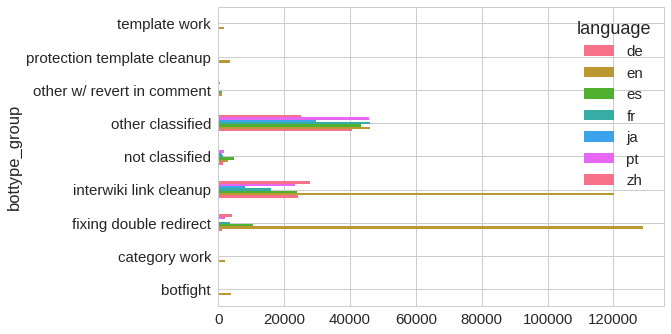

In [16]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("husl")
gb_lang_bottype_group.sum().unstack().transpose().plot(kind='barh')

## Classified time to revert

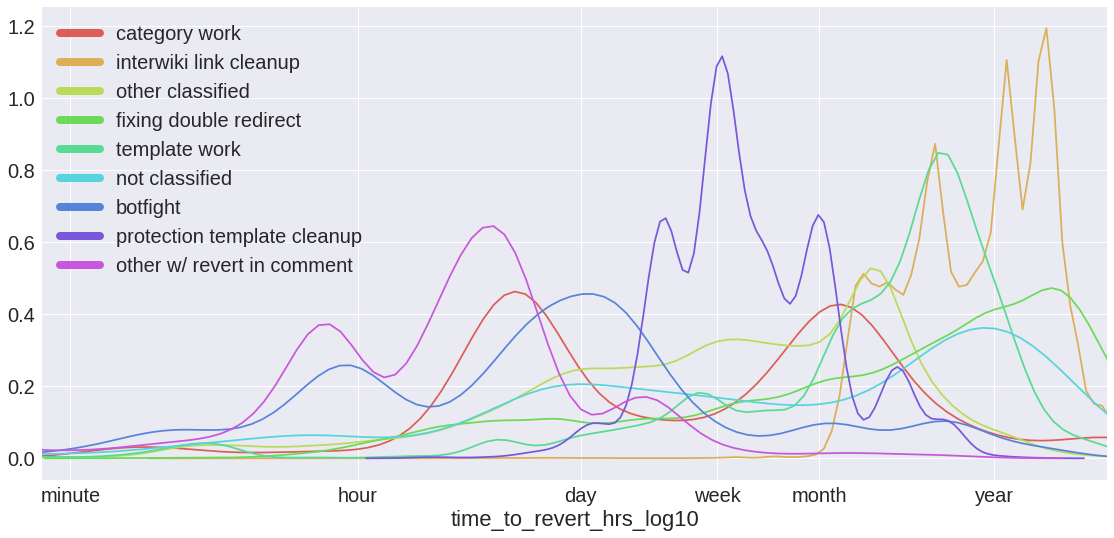

In [17]:
sns.set(font_scale=2)
pal = sns.color_palette("hls", 10)
g = sns.FacetGrid(df_all.query("page_namespace == 0 and language == 'en'"),
                  palette=pal, hue="bottype_group", size=8, aspect=2)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")
#g.add_legend()
leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

g.ax.set_xlim([np.log10(1/90), np.log10(24*365*5)])
    
g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])

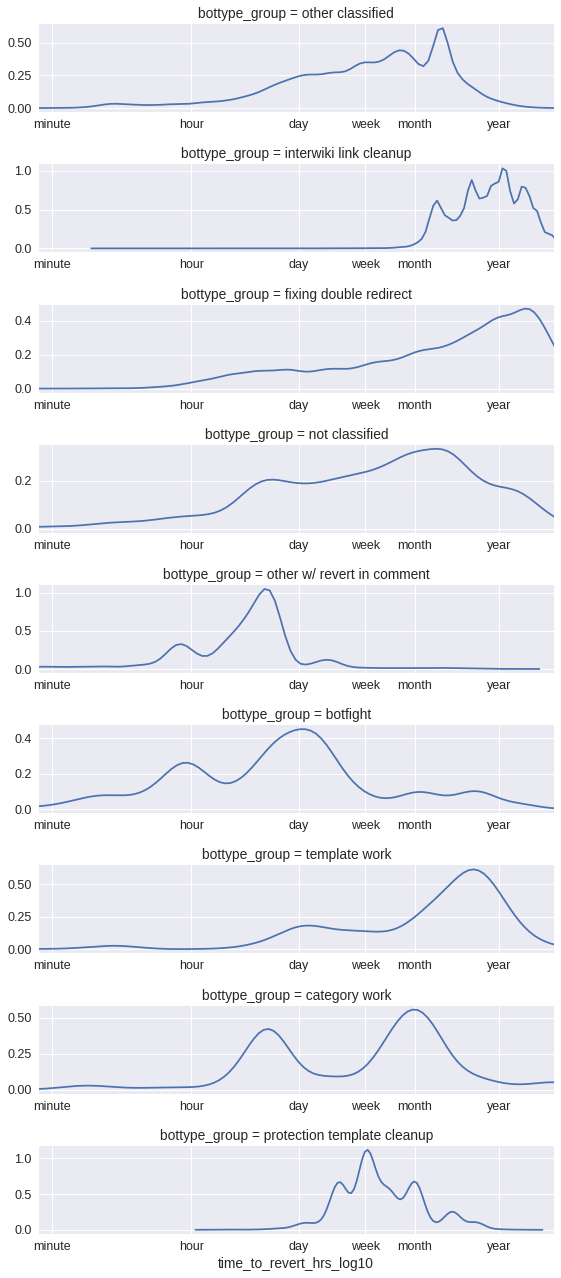

In [18]:
sns.set(font_scale=1.25)
pal = sns.color_palette("husl", 7)
g = sns.FacetGrid(df_all.query("page_namespace == 0"),
                  palette=pal, row="bottype_group", size=2, aspect=4, sharex=False, sharey=False)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")

xticks = [np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)]
xticklabels = ["minute", "hour", "day", "week", "month", "year"]

for ax in g.axes.flatten():
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_xlim(np.log10(1/90), np.log10(24*365*5))

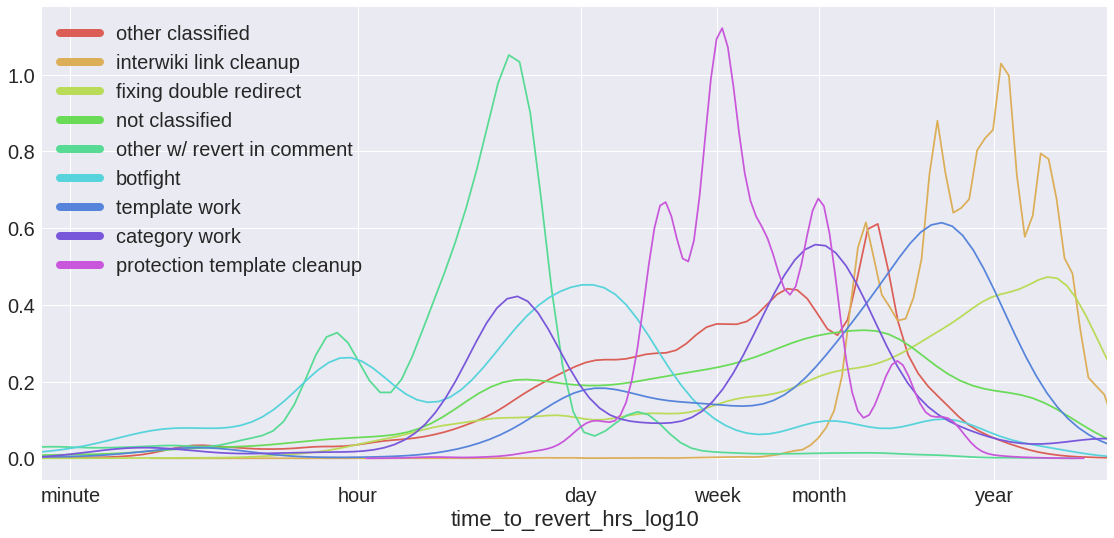

In [19]:
sns.set(font_scale=2)
pal = sns.color_palette("hls", 10)
g = sns.FacetGrid(df_all.query("page_namespace == 0"),
                  palette=pal, hue="bottype_group", size=8, aspect=2)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")
#g.add_legend()
leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

g.ax.set_xlim([np.log10(1/90), np.log10(24*365*5)])
    
g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])